In [115]:
import numpy as np
import os
import matplotlib.pyplot as plt
import meta_variables as mv
import constants_and_functions as cf
import manipulate_text as mt
from scipy.interpolate import interp2d

In [116]:
base_path = os.getcwd().split('scripts')[0]
equil_path = base_path + 'equillibrium_distribution/'


In [117]:
mx_min = 6
mx_max = 500
num_mx = 20
D0_min = 3e28
D0_max = 3e28
num_D0 = 1
mx_ar = np.array([38.6])
print(mx_ar)
D0_ar = np.array([3e27, 3e28, 3e29])
#D0_ar = np.logspace(np.log10(D0_min), np.log10(D0_max), num_D0)
print(D0_ar)
runs = mt.find_results(1, mx=mx_ar, D0=D0_ar)

[38.6]
[3.e+27 3.e+28 3.e+29]


In [106]:
runs

[{'file_name': '0009_equillibrium_distribution_info.txt',
  'mx': 38.6,
  'D0': 3e+28,
  'channel': 'bb_bar',
  'nr': 800,
  'nE': 400,
  'sigma_v': 2.2e-26},
 {'file_name': '0038_equillibrium_distribution_info.txt',
  'mx': 38.6,
  'D0': 3e+27,
  'channel': 'bb_bar',
  'nr': 800,
  'nE': 400,
  'sigma_v': 2.2e-26},
 {'file_name': '0039_equillibrium_distribution_info.txt',
  'mx': 38.6,
  'D0': 3e+29,
  'channel': 'bb_bar',
  'nr': 800,
  'nE': 400,
  'sigma_v': 2.2e-26}]

In [118]:
inds = [[], [], []]
for run in runs:
    this_D0 = run['D0']
    this_mx = run['mx']
    D0_ind = np.where(D0_ar==this_D0)[0][0]
    mx_ind = np.where(mx_ar==this_mx)[0][0]
    inds[D0_ind].append(mx_ind)
print(inds)
p = [np.argsort(sub_inds) for sub_inds in inds]
print(p)
file_names = [[runs[arg]['file_name'].split('_info')[0] + '.npy' for arg in p_D0] for p_D0 in p]
print(file_names)

[[0], [0], [0]]
[array([0]), array([0]), array([0])]
[['0009_equillibrium_distribution.npy'], ['0009_equillibrium_distribution.npy'], ['0009_equillibrium_distribution.npy']]


In [108]:
R = 50
D0_plt = D0_ar
#mx_plt = np.array([9.6])
E_set = np.array([.1, 1, 5])
rr_test, _, _, _ = mv.grid(mv.nr, mv.nE, [0, R], [cf.me, mx_ar[0]], E_spacing='log')
f_plt = np.zeros((len(E_set)*len(D0_ar), rr_test.shape[1]))
row = 0
for coef in D0_ar:
    rr, EE, _, _ = mv.grid(mv.nr, mv.nE, [0, R], [cf.me, mass], E_spacing='log')
    ind = np.where(D0_ar == coef)[0][0]
    u = np.load(equil_path + file_names[ind])
    max_nonzero = u.shape[0]
    ind = np.where(u==0)[0]
    if len(ind) > 0:
        max_nonzero = np.min(ind)
    f_interp = interp2d(rr[0], EE[:max_nonzero, 0], np.log10(u[:max_nonzero, :]/rr[:max_nonzero, :]), kind='cubic')
    for E in E_set:
        f_plt[row] = f_interp(rr[0], E)
        row +=1
    

In [82]:
rr[0][100]

6.3125

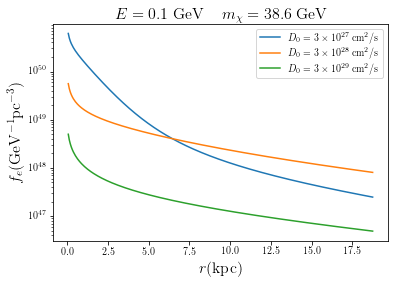

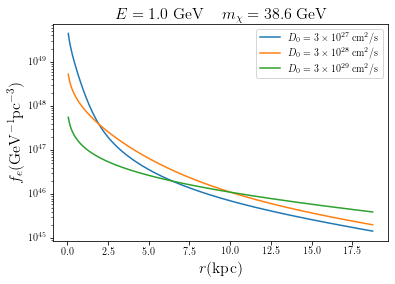

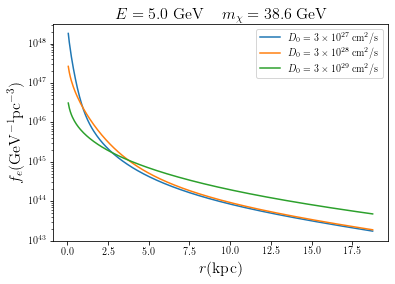

In [114]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
r = rr[0]
tex_str_D0 = ['3 10^{27}', '3 10^{28}', '3 10^{29}']
for i in range(len(E_set)):
    fig = plt.figure()
    for j in range(len(D0_ar)):
        plt.plot(r[:300], 10**(f_plt[i + j*len(E_set)][:300]), label=r'$D_0 = ' + tex_str_D0[j][0] + r'\times' + \
                 tex_str_D0[j][1:] + r'\; \mathrm{cm^2/s}$')
    plt.title(r'$E = '+ str(E_set[i]) + r' \; \mathrm{GeV} \;\;\;\; m_\chi = ' + str(mx_ar[0]) + '\;\mathrm{GeV}$', size=16)
    plt.xlabel(r'$r \mathrm{(kpc)}$', size=16)
    plt.ylabel(r'$f_e \mathrm{(GeV^{-1}pc^{-3})}$', size=16)
    plt.yscale('log')
    plt.legend()
    plt.savefig(base_path + 'figs/' + 'equil_dist_mx_' + str(mx_ar[0]) +'_E_' +str(E_set[i])+'_compare_D0.pdf')